# EECS 127 HW2 Ex 2 - Introduction to Image Processing in Python

## Representation of Images

What is an image? There isn't one exact answer to this question. Depending on who you ask (and what their area of expertise is), you would get a different answer. Someone who specializes in signal processing would consider it a two dimensional signal, whereas someone in optics might consider it a collection of intensity measurements. Both of these answers are equally correct, they are just different ways to interpret the same thing. And, depending on what we want to do with the image, interpreting images in one or several of these ways may be useful.

The two most common paradigms for images (and fittingly the definitions we will use in this class) are as a matrix or a vector of pixel values. This interpretation of images lends itself well to the concepts of this class, as you will see during the course of the semester.

Now, let’s get into how to read, write, and manipulate images using python. Before we start using real images, let's take a look at a "toy" image to better understand how to work with images in python

## Toy Image Work

### 2a) Images as Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
toy_im = np.reshape(np.linspace(0, 255, 9).astype(int), (3,3))
print(toy_im)

[[  0  31  63]
 [ 95 127 159]
 [191 223 255]]


Let's take a closer look into the toy image we have given to you. We created it by equally dividing the range of values from 0-255 into 9 parts, and reshaping it into a 3x3 matrix. In image nomenclature, each entry of the image matrix is referred to as a **pixel**

**In the code box below, print out the pixel intensities (values of the matrix) at the top left, center, and bottom right of the image**

**<u>For full credit, your solution for the center pixel and bottom right pixel must not use hard coded values, but rather properties of the image (so that this code would work for any size image)</u>** 

In [3]:
end_r, end_c = toy_im.shape
top_left_pixel = toy_im[0,0]
center_pixel = toy_im[end_r//2,end_c//2] 
bottom_right_pixel = toy_im[end_r-1,end_c-1]

print("Top Left Pixel Value: {}".format(top_left_pixel))
print("Center Pixel Value: {}".format(center_pixel))
print("Bottom Right Pixel Value: {}".format(bottom_right_pixel))

Top Left Pixel Value: 0
Center Pixel Value: 127
Bottom Right Pixel Value: 255


**Note:** We chose the range of values to be from 0-255 as convention, because most grayscale images are represented by 8-bit pixel values (and color, or RGB, images get 8 bits per color per pixel)

Now we have a matrix that represents our image, great. However, this doesn't quite look like an image yet. How could we visualize this matrix as an image? Luckily, matplotlib has a function called `imshow` that does exacly what we want to do. It takes in a matrix as the argument and displays it as an image. "Plot" the image below.

Before running the code below, think about the what the matrix might look like as an image.

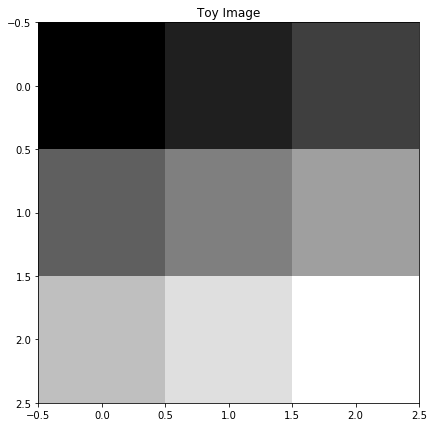

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(toy_im, cmap='gray', vmin=0, vmax=255)
plt.title("Toy Image")
plt.show()

Before we move on, let's understand what these keyword arguments do.

- `cmap`: Specifies the color map `imshow` uses to display the image. By setting it to 'gray', we plot using grayscale rather than another color scheme. This is probably the most common way to visualize matrices, but if you are interested in looking at some of the other colormap options, you can read the matplotlib documentation

- `vmin` and `vmax`: Specifies the range of values used to scale the image. If not provided, `imshow` will automatically scale the image between the min and max of the image. This works well in most cases, but these parameters are useful in case you want to change the contrast of the image.

We recommend playing with these parameters in the code block above to get a feel for how they change how the matrix is portrayed.

#### Reflecting Images

As an exercise of image manipulation, **in the code box below, reflect the `toy_im` across the x-axis (horizontal), y-axis (vertical), and both x and y axes**

Hint: There is a simple solution using array splicing techniques

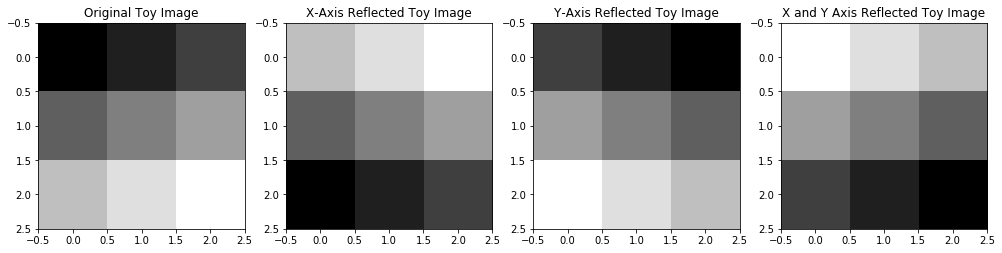

In [5]:
x_reflected_im = toy_im[::-1,:]
y_reflected_im = toy_im[:,::-1]
xy_reflected_im = toy_im[::-1,::-1]

plt.figure(figsize=(17,10))
imgs = [toy_im, x_reflected_im, y_reflected_im, xy_reflected_im]
titles = ["Original Toy Image", "X-Axis Reflected Toy Image", "Y-Axis Reflected Toy Image", "X and Y Axis Reflected Toy Image"]
for i in range(len(imgs)):
    plt.subplot(1, 4, i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(titles[i])
plt.show()

### 2b) Images as Vectors

Now that we have seen images as a matrix, let's take a look at images as vectors. To go from a matrix to a vector, it is as simple as taking each row of the matrix and stacking them onto each other to get a vector. So, we can represent any $\mathbb{R}^{m\times n}$ matrix as a $\mathbb{R}^{mn}$ vector.

We won't spend too much time on images as vectors in this notebook, but you will see during the rest of the course how this can be a powerful representation that enables us to apply various salient linear algebra concepts to images.

**In the code block below, take the `toy_im` matrix and represent it as a vector**

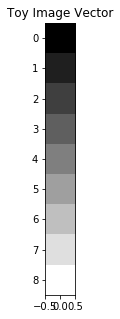

In [6]:
#Hint: there is a numpy function that unravels a matrix into a vector
toy_vec = toy_im.ravel()[:]

toy_vec = toy_vec.reshape((9,1))
plt.figure(figsize=(10,5))
plt.imshow(toy_vec, cmap='gray')
plt.title("Toy Image Vector")
plt.show()

#If your code is correct, you should see a vector of grayscale intensities going from 
#black at the top and increasingly getting brighter until it is white at the bottom of the vector

#### Toy Image Column Vector

As an exercise of image manipulation, **in the code box below, display the first column of `toy_im` as a vector**

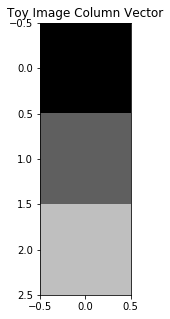

In [7]:
im_col = toy_im[:,0,None]

plt.figure(figsize=(5,5))
plt.imshow(im_col, cmap='gray', vmin=0, vmax=255)
plt.title("Toy Image Column Vector")
plt.show()

**Note:** If did not specify the vmin and vmax in this example, we wouldn't be able to distinguish which column we chose. This is because the `imshow` function would rescale to the min and max of the provided data.

### "Continuous" Images

With the work you've done above, you should now be somewhat familiar with the basics of image representation and manipulation in python. However, you may be wondering how these examples would relate to "actual" images, since so far we've just been using this blocky toy example. After all, this toy image isn't what you would first think of when you heard the term "image."

Well, all images have this underlying representation. The only difference is that most images have a much higher **resolution**. What exactly does that mean? Simply put, it means there are more pixels to represent the image. The more pixels we use to represent our image, the more "continuous" our image looks.

Run the code block below to see how a gradient (just like our toy image) can be depicted using varying resolutions

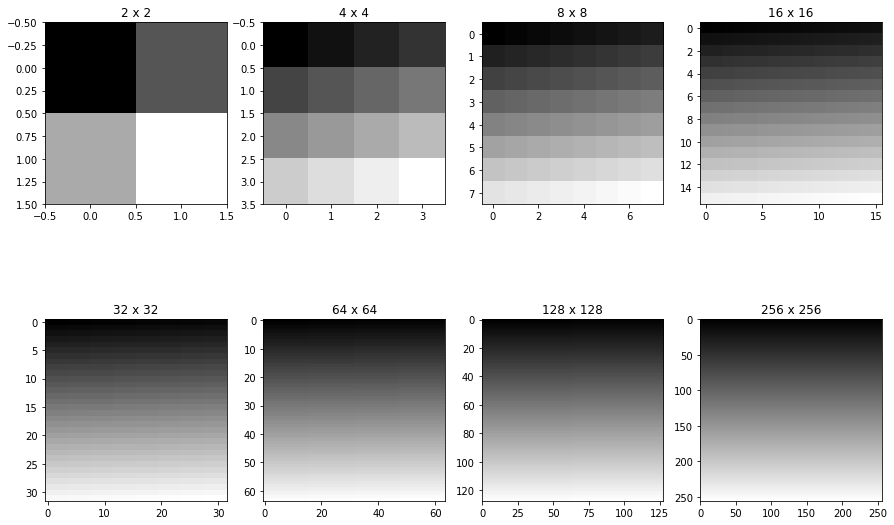

In [8]:
plt.figure(figsize=(15,10))
for i in range(1,9):
    plt.subplot(2,4,i)
    dim = 2**i
    plt.title("{} x {}".format(dim, dim))
    plt.imshow(np.reshape(np.linspace(0, 255, dim*dim), (dim,dim)), cmap='gray')

plt.show()

## Real Image Work

Now that we understand how images are represented and manipulated in python, we can now get our hands dirty with a real image.

First, how do we read an image? Well, the answer to that depends on how the image was saved (i.e. its file type). When dealing with raw matrices saved to disk (a `.npy` file), we can use in-built numpy functions to read and write. This is useful if we know we are reading and writing images in python.

There are plenty of other file formats we can (and probably will during the semester) use, such as `.tif`, `.png`, `.bmp`, `.jpeg`, etc. These file types will also contain the image as a matrix, but add on top of that some metadata (headers) and compression according to some standard. For these types of files, python has external library support, and we will use those libraries to read these files.

For this notebook, we will use matplotlib functions `imread` and `imsave`. With the support of the PIL library (which is included in your ee127 conda env), these functions are capable of reading a variety of file types.

### 2c) Reading Images

**Using the matplotlib `imread` function, read in the image we've provided, named `rose1024.tiff`**

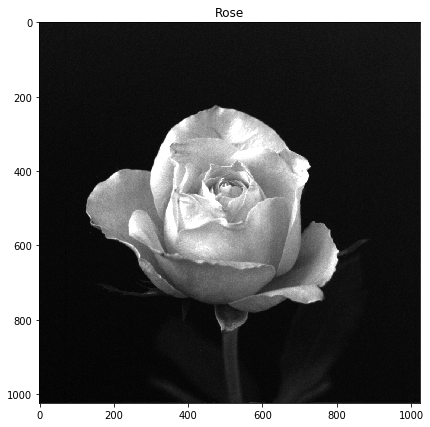

In [9]:
im = plt.imread("rose1024.tiff")

plt.figure(figsize=(7,7))
plt.imshow(im, cmap='gray')
plt.title("Rose")
plt.show()

### 2d) Real Image Manipulation

**In the codebox below, downsample the image by a factor of 32 in each dimension to pixelate it**

This is similar to doing the opposite of the continuous gradient example above. By downsampling the image, we are using less pixels to represent it, which lowers its resolution and leads to a pixelated effect that you may be familiar with.

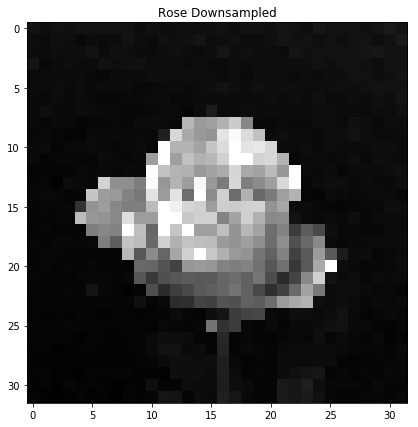

In [10]:
im_low_res = im[::32, ::32]

plt.figure(figsize=(7,7))
plt.imshow(im_low_res, cmap='gray')
plt.title("Rose Downsampled")
plt.show()

### 2e) Writing Image FIles

**Using the matplotlib `imsave` function, save the downsampled image as a new file, and try to open it up from your file manager**

Make sure you specify a color map when writing to disk. Also, make sure to specify the file extension in the file name.

In [11]:
plt.imsave("downsampled_rose.tiff", im_low_res, cmap='gray')